In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df= pd.read_csv('Global Food Security Index 2022.csv')


In [4]:
# İlk birkaç satırı göster


# Veri setinin yapısını ve eksik değerleri kontrol edin
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     113 non-null    int64  
 1   Rank                           113 non-null    object 
 2   Country                        113 non-null    object 
 3   Overall score                  113 non-null    float64
 4   Affordability                  113 non-null    float64
 5   Availability                   113 non-null    float64
 6   Quality and Safety             113 non-null    float64
 7   Sustainability and Adaptation  113 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 7.2+ KB


Unnamed: 0                       0
Rank                             0
Country                          0
Overall score                    0
Affordability                    0
Availability                     0
Quality and Safety               0
Sustainability and Adaptation    0
dtype: int64

In [5]:
df.head()

,Unnamed: 0,Rank,Country,Overall score,Affordability,Availability,Quality and Safety,Sustainability and Adaptation
0,0,1st,Finland,83.7,91.9,70.5,88.4,82.6
1,1,2nd,Ireland,81.7,92.6,70.5,86.1,75.1
2,2,3rd,Norway,80.5,87.2,60.4,86.8,87.4
3,3,4th,France,80.2,91.3,69.0,87.7,70.3
4,4,5th,Netherlands,80.1,92.7,70.7,84.7,69.2


In [6]:
# Eksik değerleri doldurma veya kaldırma
df.dropna(inplace=True)  # Veya belirli sütunlar için eksik değerleri doldurun

# Gerekirse kategorik değişkenleri sayısal verilere dönüştürün
df['Rank'] = df['Rank'].astype('category').cat.codes


In [7]:
df.head()

,Unnamed: 0,Rank,Country,Overall score,Affordability,Availability,Quality and Safety,Sustainability and Adaptation
0,0,20,Finland,83.7,91.9,70.5,88.4,82.6
1,1,29,Ireland,81.7,92.6,70.5,86.1,75.1
2,2,40,Norway,80.5,87.2,60.4,86.8,87.4
3,3,47,France,80.2,91.3,69.0,87.7,70.3
4,4,56,Netherlands,80.1,92.7,70.7,84.7,69.2


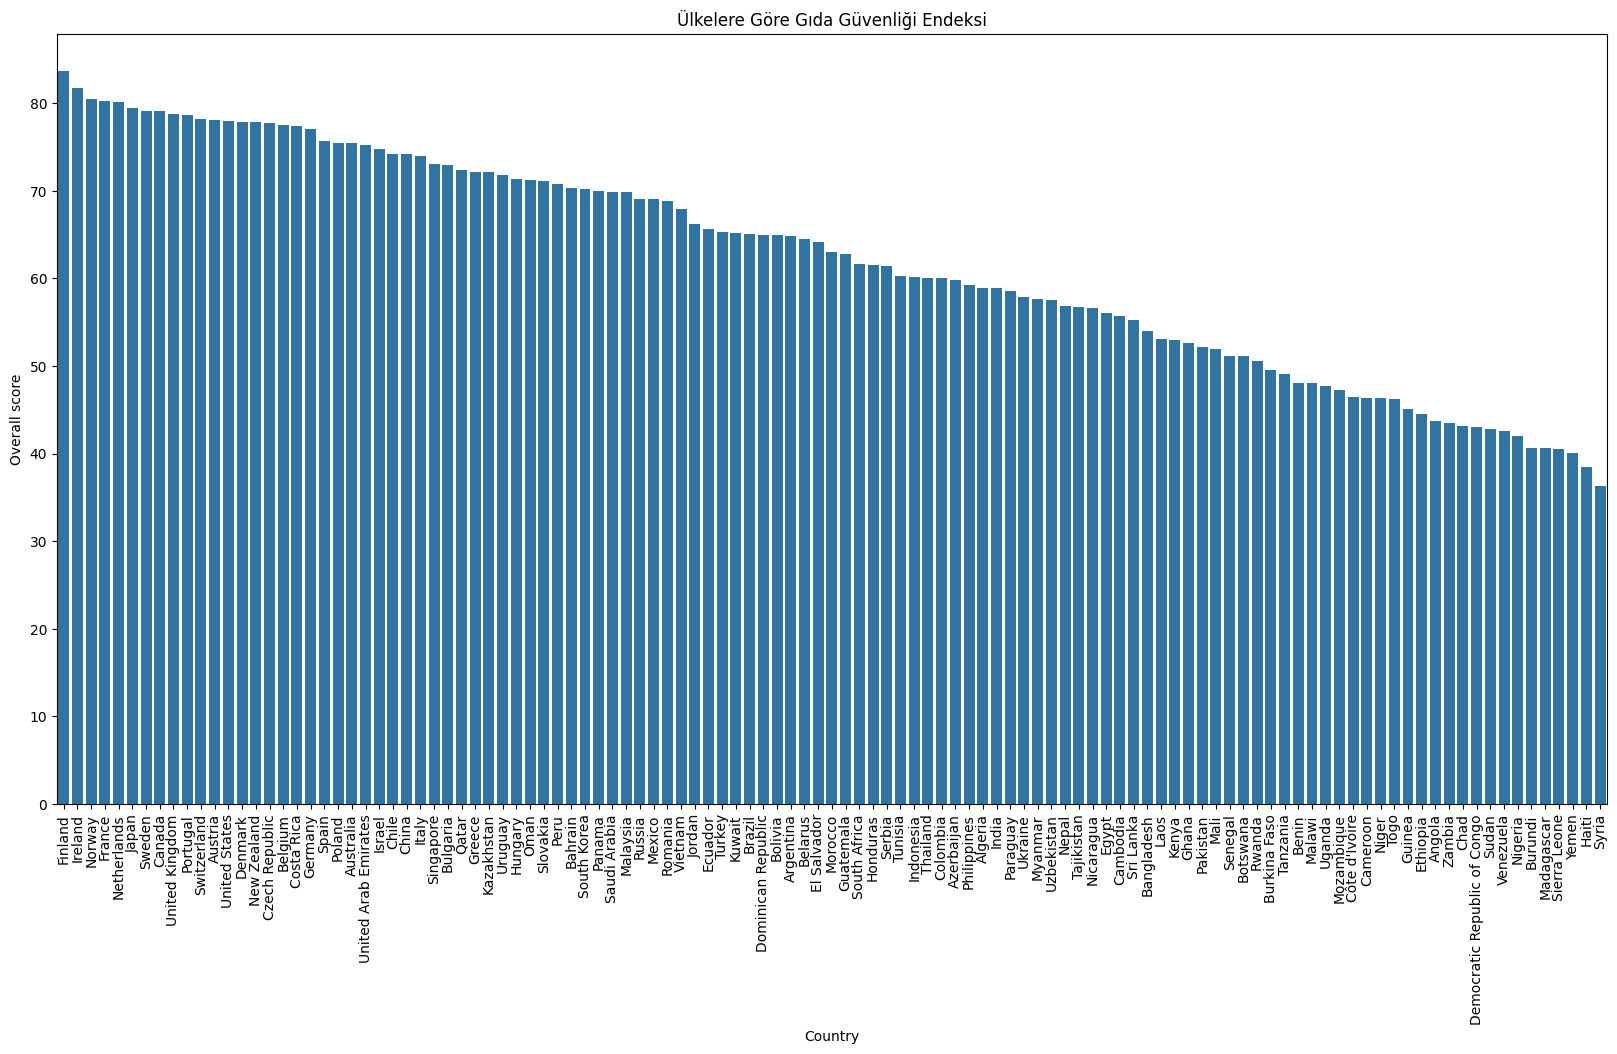

In [11]:
# Ülkeler bazında gıda güvenliği durumunu gösteren bir grafik
plt.figure(figsize=(20, 10))
sns.barplot(x='Country', y='Overall score', data=df)
plt.title('Ülkelere Göre Gıda Güvenliği Endeksi')
plt.xticks(rotation=90)
plt.show()


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

In [15]:
# Hedef değişkeni belirleme (örneğin, Overall score)
df['Target'] = np.where(df['Overall score'] > 75, 1, 0)

# Özellikleri ve hedef değişkeni ayırma
X = df[['Affordability', 'Availability', 'Quality and Safety', 'Sustainability and Adaptation']]
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [16]:
Model=RandomForestClassifier(n_estimators=100)
Model.fit(X_train,y_train)
y_scores = Model.predict_proba(X_test)[:, 1]

RandomForestClassifier()

In [18]:
# ROC eğrisini çizme
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)


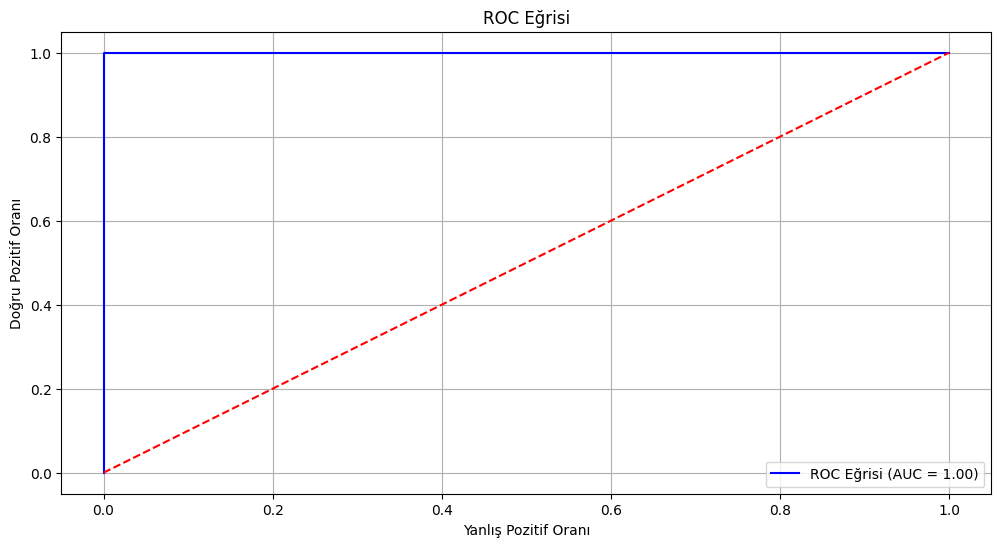

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Eğrisi (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('ROC Eğrisi')
plt.xlabel('Yanlış Pozitif Oranı')
plt.ylabel('Doğru Pozitif Oranı')
plt.legend(loc='lower right')
plt.grid()
plt.show()